<a href="https://colab.research.google.com/github/ali-kmirzaei/YOLO/blob/main/train.YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialization:**

In [1]:
!git clone https://github.com/ultralytics/yolov5 

Cloning into 'yolov5'...
remote: Enumerating objects: 12824, done.
remote: Total 12824 (delta 0), reused 0 (delta 0), pack-reused 12824
Receiving objects: 100% (12824/12824), 11.75 MiB | 5.02 MiB/s, done.
Resolving deltas: 100% (8914/8914), done.


In [ ]:
%cd yolov5
!pip install -r requirements.txt 

In [ ]:
# import dataset from google drive
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive


Mounted at /content/gdrive
 4001419029.zip     extra.zip   newPack.zip   step2_6000.weights
'Colab Notebooks'   last.pt     obj.zip


In [ ]:
!cp -rf /mydrive/last.pt ../yolov5/weights.pt

In [ ]:
!unzip /mydrive/newPack.zip -d data

In [ ]:
!cp /mydrive/last.pt data/last_trained.pt

In [ ]:
!unzip /mydrive/extra.zip -d data/images/extra_test

# **split train and test files:**

In [3]:
import os
import glob
import random
import shutil

In [ ]:
!rm -rf data/images
!rm -rf data/labels

!mkdir data/images
!mkdir data/images/test
!mkdir data/images/train

!mkdir data/labels
!mkdir data/labels/test
!mkdir data/labels/train

In [ ]:
image_list = list()
label_list = list()
total_tuples = list()

total = glob.glob('data/newPack/*')
total.sort()

for i in range(0, len(total)-1, 2):
  total_tuples.append((total[i], total[i+1]))

# # validate list:
# for tpl in total_tuples:
#   if tpl[0][13: 23] != tpl[1][13: 23]:
#     print("ERROR")

random.shuffle(total_tuples)

num = 1085
for i in range(num):
  # IMG
  src = total_tuples[i][0]
  dst = 'data/images/train/'+src[13:]
  shutil.copyfile(src, dst)
  # LBL
  src = total_tuples[i][1]
  dst = 'data/labels/train/'+src[13:]
  shutil.copyfile(src, dst)

for i in range(num, 1550):
  # IMG
  src = total_tuples[i][0]
  dst = 'data/images/test/'+src[13:]
  shutil.copyfile(src, dst)
  # LBL
  src = total_tuples[i][1]
  dst = 'data/labels/test/'+src[13:]
  shutil.copyfile(src, dst)

In [ ]:
# Check Distributions

alls = glob.glob('data/newPack/*.jpg')
trains = glob.glob('data/images/train/*')
tests = glob.glob('data/images/test/*')
nums = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']

cnt = 0
for all in alls:
  if all[13] in nums:
    cnt += 1
all_per = 100 * cnt / len(alls)


cnt = 0
for test in tests:
  if test[18] in nums:
    cnt += 1
test_per = 100 * cnt / len(tests)

cnt = 0
for train in trains:
  if train[19] in nums:
    cnt += 1
train_per = 100 * cnt / len(trains)

print(all_per, test_per, train_per)

58.064516129032256 57.204301075268816 58.433179723502306


# **train and test and visualization model:**

In [ ]:
!rm -rf runs/train/yolo_idcard32

In [ ]:
# TRAIN
!python train.py --img 640 --cfg data/yolov5s.yaml --batch 64 --epochs 100 --data idcard_data.yaml --weights yolov5s.pt --name yolo_idcard3 --cache

In [ ]:
# Free Space!

In [ ]:
# TEST
!python val.py --data idcard_data.yaml --weights runs/train/yolo_idcard35/weights/last.pt --name yolo_idcard3 --task val

In [ ]:
# Visualize
from utils.plots import plot_results
plot_results('results.csv')

In [ ]:
# DETECT
!python detect.py --source 01.jpeg --weights weights.pt --name yolo_idcard_extra --save-crop

In [ ]:
!cp -r runs/detect/ /mydrive/YOLOv5Performance/new_detect

In [ ]:
!mkdir /mydrive/YOLOv5Performance/200e/val

In [ ]:
!rm -rf runs/detect/yolo_idcard_extra2

# **OCR:**

In [5]:
!pip uninstall imgaug

Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/imgaug-0.2.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/imgaug/*
Proceed (y/n)? y
  Successfully uninstalled imgaug-0.2.9


In [7]:
!pip install pytesseract

In [ ]:
!sudo apt-get install tesseract-ocr-fas

In [1]:
from PIL import Image
import pytesseract
# import cv2 as cv

In [10]:
import cv2 as cv

In [18]:
import numpy as np

In [ ]:
!pip install --ignore-installed Pillow==9.0.0

In [56]:
from matplotlib import pyplot as plt

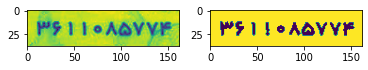

۳۶ ۵۷۴



In [108]:
img = cv.imread('id2.png', 0)

# a = np.double(img)
# b = a + 15
# img = np.uint8(b)

# dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)

# img = cv.medianBlur(img,5)
# dst = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

ret1,dst = cv.threshold(img,127,255,cv.THRESH_BINARY)

# a = np.double(dst)
# b = a + 15
# dst = np.uint8(b)


plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

# dst.save("id4.png", dpi=(300,300))

LANG = "fas"
print(pytesseract.image_to_string(dst, lang=LANG))

۳۶۱ ۱ ۸۷۷۴



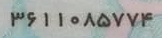

In [46]:
# IMG = Image.open('id.jpg')
# IMG.save("id3.png", dpi=(600,600))
IMG = Image.open('id3.png')
# IMG = cv.cvtColor(IMG, cv.COLOR_RGB2BGR)
IMG = IMG.convert("0")
# IMG = cv.imread('id.jpg', cv.IMREAD_GRAYSCALE)
LANG = "fas"
CONFIG = "--psm 11 --oem 3"
print(pytesseract.image_to_string(IMG, lang=LANG))
IMG